# Kaggle Machine Learning Competition: Predicting Titanic Survivers

# Problem Description
### On April 15, 1912, the largest passenger liner ever collided with an iceberg during her maiden voyage,  killing 1502 out of 2224 passengers and crew. The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. 
### In this challenge, we have been asked to calculate the conditional probability that a person survives by applying the tools of machine learning.

# Evaluation
### The historical data has been split into two groups, a 'training set' and a 'test set'. For the training set, we provide the outcome ( 'ground truth' ) for each passenger. You will use this set to build your model to generate predictions for the test set.

### For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived ). Your score is the percentage of passengers you correctly predict.

<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

# Getting Started

### To begin working with the Titanic dataset, we'll first need to import essential libraries we need, and then load our data into a pandas DataFrame.
### "Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function."    

In [61]:
#Import the libraries 
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from IPython.display import display

#pretty display
%matplotlib inline

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

#Setting the global default size of matplotlib
plt.rc('figure',figsize=(10, 5))
bin_size = 10

In [62]:
#Loading the data
train_df = pd.read_csv("D:\\Datasets\\titanic\\train.csv")

In [63]:
#Print the first few entries of the Titanic Dataset
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [64]:
#Print the first few entries of the Titanic Dataset
train_df.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [65]:
#Print the first few entries of the Titanic Dataset
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

### Get some basic information on the DataFrame:

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Generate various descriptive statistics on the DataFrame:

In [67]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p> Now that we have some basic intuition about the data, we dive deep by doing some exploratory analysis and cleaning the data to setup the 'features' that we will actually use in machine learning algorithms. </p>

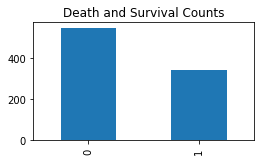

In [68]:
# Set up a grid of plots
fig = plt.figure(figsize=(23, 10)) 
fig_dims = (4, 5)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 1))
train_df['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

In [69]:
train_df['Survived'].count()

891

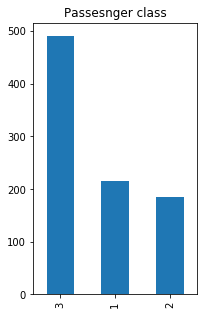

In [70]:
fig_dims = (1, 3)
plt.subplot2grid(fig_dims, (0,1))
train_df['Pclass'].value_counts().plot(kind='bar',
                                      title = 'Passesnger class')

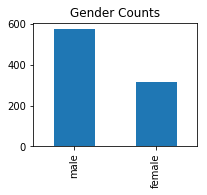

In [71]:
fig_dims = (2, 3)
plt.subplot2grid(fig_dims, (1,0))
train_df['Sex'].value_counts().plot(kind = 'bar',
                                   title = 'Gender Counts')

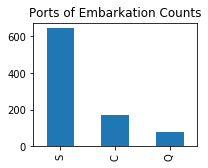

In [72]:
# Plot Embarked counts
fig_dims = (2, 3)
plt.subplot2grid(fig_dims, (1, 1))
train_df['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

Text(0.5, 1.0, 'Age Histogram')

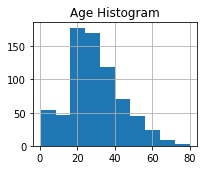

In [73]:
fig_dims = (2, 3)
# Plot the Age histogram
plt.subplot2grid(fig_dims, (1, 0))
train_df['Age'].hist()
plt.title('Age Histogram')

<p> Now lets explore how the features affect the rate of survival. </p>

<p>  we see there are three passenger classes: First, Second, and Third class. We'll determine which proportion of passengers survived based on their passenger class. </p>

In [74]:
new_pclass = pd.crosstab(train_df['Pclass'], train_df['Survived'])
new_pclass


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


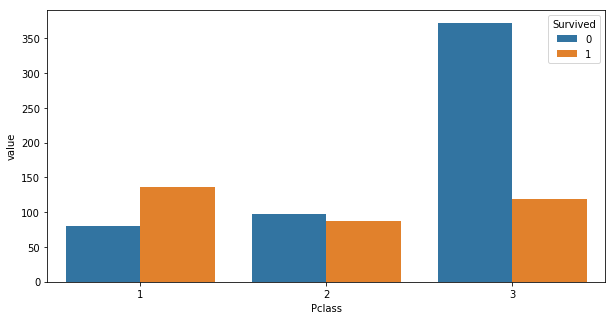

In [75]:
stacked = new_pclass.stack().reset_index().rename(columns={0:'value'})

#plot grouped bar chart
sns.barplot(x=stacked.Pclass, y = stacked.value, hue=stacked.Survived)

## Feature: Embarked

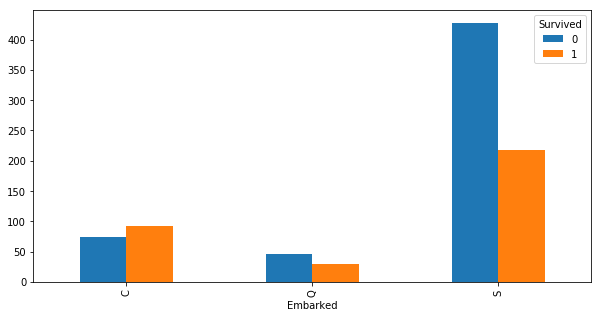

In [76]:
my_tab = pd.crosstab(train_df['Embarked'], train_df['Survived'])
my_tab.plot.bar()

In [77]:
train_df[train_df['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [78]:
#embarked_locs = sorted(train_df['Embarked'].unique())
#train_df['Embarked'].fillna(mode(Train['Embarked'], nan_policy='omit')[0], inplace=True)
#After encountering multiple errors, I have planned to fill the two missing values with 
#most occured value, which is 'S'.
train_df["Embarked"] = train_df["Embarked"].fillna("S")
embarked_locs = sorted(train_df['Embarked'].unique())
embarked_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs)+1)))
embarked_mapping

{'C': 0, 'Q': 1, 'S': 2}

In [79]:
train_df['Embarked_Val'] = train_df['Embarked'] \
                            .map(embarked_mapping) \
.astype(int)
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


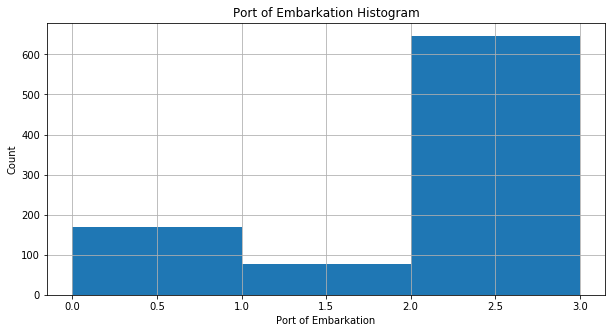

In [80]:
train_df['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [81]:
if len(train_df[train_df['Embarked'].isnull()] > 0):
    train_df.replace({'Embarked_Val' : 
                   { embarked_locs_mapping[nan] : embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)

In [82]:
embarked_locs = sorted(train_df['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Text(0, 0.5, 'Survival Rate')

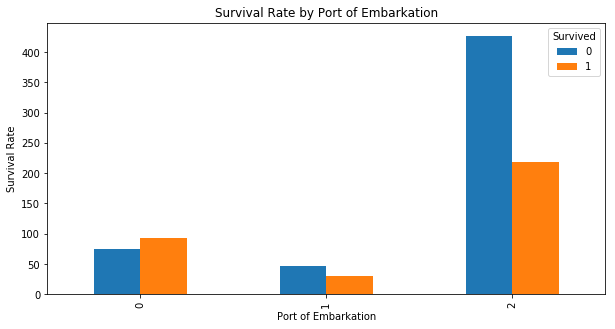

In [83]:
#Plotting the crosstab of embarked and survived
embarked_ct = pd.crosstab(train_df['Embarked_Val'], train_df['Survived'])
embarked_ct.plot(kind='bar',title='Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

In [84]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Embarked_Val'], prefix='Embarked_Val')], axis=1)

In [85]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,0,1


## Feature: Sex

###  Gender can also play an important role in determining the survival of passengers. Here we map genders from string to number.

In [86]:
#String to number representation
sexes = sorted(train_df['Sex'].unique())
mapped = dict(zip(['male','female'],[0,1]))
mapped

{'male': 0, 'female': 1}

In [87]:
train_df['SexC'] = train_df['Sex'].map(mapped).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,SexC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0,0,1,0


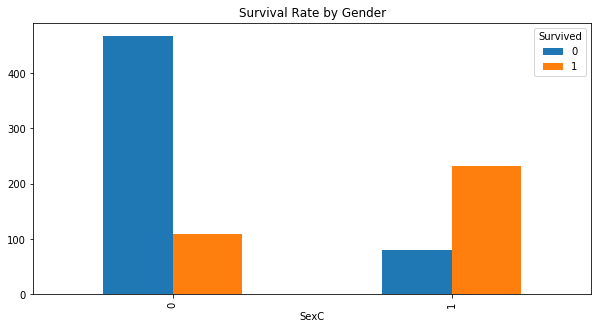

In [88]:
sex_val_ct = pd.crosstab(train_df['SexC'],train_df['Survived'])
sex_val_ct.plot(kind = 'bar',title='Survival Rate by Gender')

### Now we will gather insights on survival rate by looking at Sex and Pclass.

In [89]:
passenger_classes = sorted(train_df['Pclass'].unique())
for p_class in passenger_classes:
    print("M:",p_class, len(train_df[(train_df['Sex']=='male') & (train_df['Pclass'] == p_class)]))
    print("F:",p_class, len(train_df[(train_df['Sex']=='female')& (train_df['Pclass'] == p_class)]))

M: 1 122
F: 1 94
M: 2 108
F: 2 76
M: 3 347
F: 3 144


### Plot the survival rate based on each gender

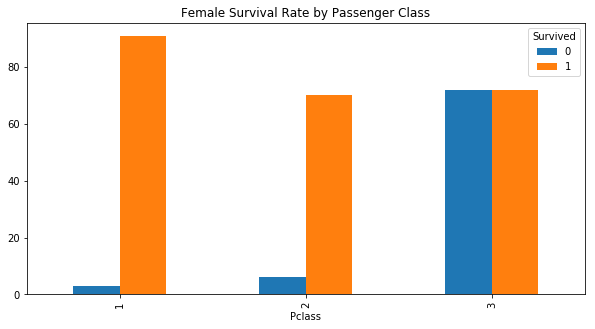

In [90]:
female_df = train_df[train_df['Sex'] == 'female']
#Producing a crosstab
female_ct = pd.crosstab(female_df['Pclass'], train_df['Survived'])
female_ct.plot(kind="bar", title='Female Survival Rate by Passenger Class')

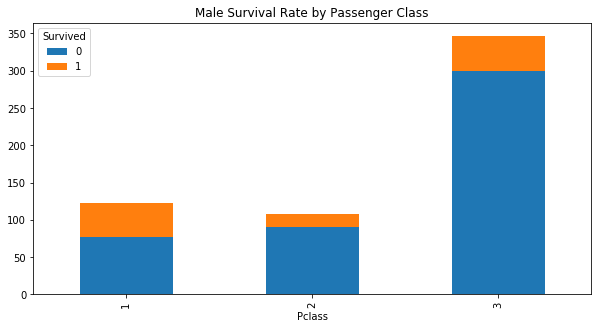

In [91]:
male_df = train_df[train_df['Sex'] == 'male']
male_ct = pd.crosstab(male_df['Pclass'], male_df['Survived'])
male_ct.plot(kind='bar',stacked = True, title='Male Survival Rate by Passenger Class')

# Feature: Age

In [92]:
train_df[train_df['Age'].isnull()][['Sex','Pclass','Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [93]:
train_df['AgeFill'] = train_df['Age']

# Populate AgeFill
train_df['AgeFill'] = train_df['AgeFill'] \
                        .groupby([train_df['SexC'], train_df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [94]:
len(train_df[train_df['AgeFill'].isnull()])

0

C:\Users\Anuj\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anuj\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Age')

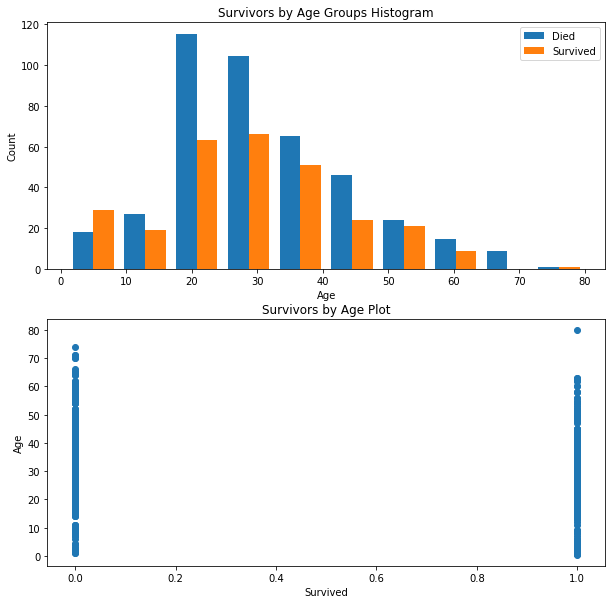

In [95]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
# Histogram of AgeFill segmented by Survived
df1 = train_df[train_df['Survived'] == 0]['Age']
df2 = train_df[train_df['Survived'] == 1]['Age']
max_age = max(train_df['AgeFill'])
axes[0].hist([df1, df2], 
             range=(1, max_age))
axes[0].legend(('Died', 'Survived'))
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(train_df['Survived'], train_df['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

In [96]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,SexC,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,0,1,1,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,1,1,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0,0,1,0,35.0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0,1,0,0,25.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2,0,0,1,0,54.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2,0,0,1,0,2.0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0,0,1,1,27.0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,1,14.0,1


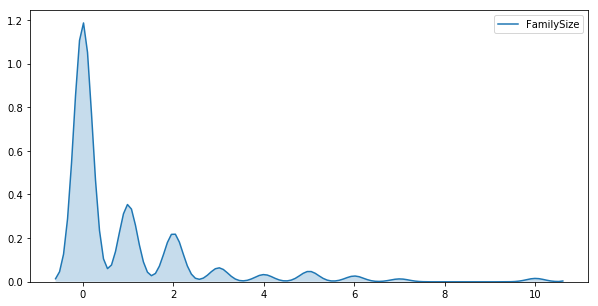

In [97]:
sns.kdeplot(train_df['FamilySize'], shade=True)

Text(0.5, 1.0, 'Family Size Histogram')

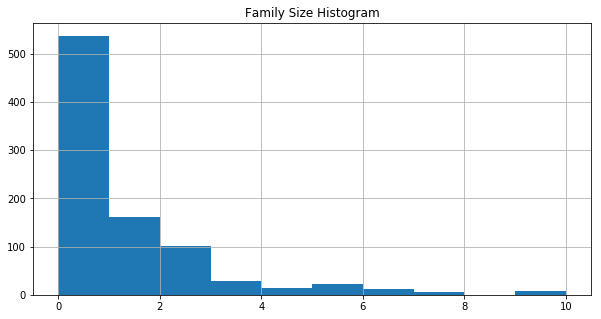

In [98]:
train_df['FamilySize'].hist()
plt.title('Family Size Histogram')

Text(0.5, 1.0, 'Survivors by Family Size')

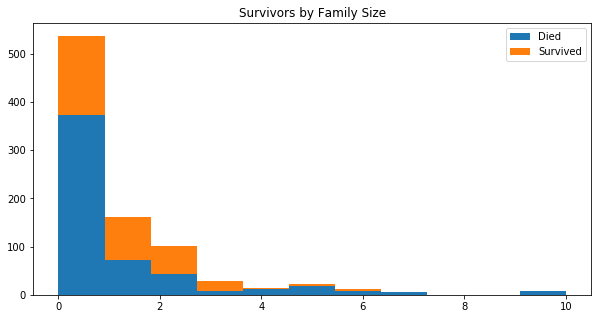

In [99]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(train_df['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = train_df[train_df['Survived'] == 0]['FamilySize']
df2 = train_df[train_df['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

In [100]:
#Preparing the data as machine learning algorithms work only with with arrays.
train_df.loc[:, train_df.dtypes == np.object].columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [101]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,SexC,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,0,0,1,0,22.0,1


In [102]:
#Lets remove these columns as it wont affect out algorithm
train_df = train_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
                         axis=1)

In [103]:
train_df = train_df.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
train_df.dtypes

Survived            int64
Pclass              int64
Fare              float64
Embarked_Val_0      uint8
Embarked_Val_1      uint8
Embarked_Val_2      uint8
SexC                int32
AgeFill           float64
FamilySize          int64
dtype: object

In [120]:
#v = train_df.to_numpy(copy=True)
#v
train_data = train_df.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  1.    ,  0.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    ,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  1.    ,  1.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  1.    ,  1.    ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  0.    ,  0.    ,  0.    ]])

In [105]:
def clean_data(df, drop_passenger_id):
    
    # Get the unique values of Sex
    sexes = sorted(df['Sex'].unique())
    
    # Generate a mapping of Sex from a string to a number representation    
    #genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
    genders_mapping = dict(zip(['male','female'],[0,1]))
    # Transform Sex from a string to a number representation
    df['SexC'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Get the unique values of Embarked
    embarked_locs = sorted(df['Embarked'].unique())

    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, 
                                     range(0, len(embarked_locs) + 1)))
    
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    # Fill in missing values of Embarked
    # Since the vast majority of passengers embarked in 'S': 3, 
    # we assign the missing values in Embarked to 'S':
    if len(df[df['Embarked'].isnull()] > 0):
        df.replace({'Embarked_Val' : 
                       { embarked_locs_mapping[nan] : embarked_locs_mapping['S'] 
                       }
                   }, 
                   inplace=True)
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()] > 0):
        avg_fare = df['Fare'].mean()
        df.replace({ None: avg_fare }, inplace=True)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by SexC.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['SexC'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

In [106]:
#Machine Learning using Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [107]:
train_df = train_df.fillna(train_df.mean())

In [108]:
train_df.drop(train_df.columns[7], axis=1, inplace=True)

In [109]:
train_df.head(1)

,Survived,Pclass,Fare,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,SexC,FamilySize
0,0,3,7.25,0,0,1,0,1


In [110]:
#train_df._is_view
#col_mask=train_df.isnull().any(axis=1) 
#train_df[train_df==np.inf]=np.nan
#train_df.fillna(train_df.mean(), inplace=True)
#np.where(train_df.values >= np.finfo(np.float64).max)
#train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#train_df.fillna(train_df.mean(), inplace=True)
#train_df.sum() to see if any values are infinite
np.where(train_df.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [111]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9809203142536476'

# Prediction

In [129]:
test_frame = pd.read_csv("D:\\Datasets\\titanic\\test.csv")
test_frame.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [126]:
test_frame = sorted(test_frame['Sex'].unique())

In [ ]:
test_frame[test_frame['Embarked'].isnull()]
test_frame["Embarked"] = test_frame["Embarked"].fillna("S")
embarked_locs = sorted(test_frame['Embarked'].unique())
embarked_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs)+1)))
embarked_mapping
test_frame['Embarked_Val'] = test_frame['Embarked'] \
                            .map(embarked_mapping) \
.astype(int)
test_frame.head(2)


In [ ]:
test_frame = pd.concat([test_frame, pd.get_dummies(test_frame['Embarked_Val'], prefix='Embarked_Val')], axis=1)
test_frame.head(2)

In [130]:
#String to number representation
sexes = sorted(test_frame['Sex'].unique())
mapped = dict(zip(['male','female'],[0,1]))
mapped

test_frame['SexC'] = test_frame['Sex'].map(mapped).astype(int)
test_frame.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
test_frame['AgeFill'] = test_frame['Age']

# Populate AgeFill
test_frame['AgeFill'] = test_frame['AgeFill'] \
                        .groupby([test_frame['SexC'], test_frame['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))




In [ ]:

test_frame['FamilySize'] = test_frame['SibSp'] + test_frame['Parch']
test_frame



In [ ]:
    # Drop the columns we won't use:
test_frame = test_frame.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
test_frame = test_frame.drop(['Age', 'SibSp', 'Parch'], axis=1)
test_frame = test_frame.drop(['PassengerId'], axis = 1)

In [131]:
test_frame = test_frame.fillna(test_frame.mean())

In [ ]:
np.where(test_frame.values >= np.finfo(np.float64).max)

In [132]:
# Data wrangle the test set and convert it to a numpy array
test_frame = clean_data(test_frame, drop_passenger_id=False)

t = test_frame.values

In [133]:
test_frame.columns

Index(['PassengerId', 'Pclass', 'Fare', 'SexC', 'Embarked_Val_C',
       'Embarked_Val_Q', 'Embarked_Val_S', 'AgeFill', 'FamilySize'],
      dtype='object')

In [134]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = t[:, 1:]

# Predict the Survival values for the test data
test_y = clf.predict(test_x).astype(int)

In [135]:
test_y

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [137]:
test_frame['Survived'] = test_y
test_frame[['PassengerId', 'Survived']] \
    .to_csv('D:\\Datasets\\titanic\\results-rf.csv', index=False)

In [138]:
new_df = pd.read_csv('D:\\Datasets\\titanic\\results-rf.csv')

In [145]:
new_df['Survived'].dtype

dtype('int64')

In [146]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 8) (891,)
(712, 8) (712,)
(179, 8) (179,)


In [148]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.83


In [1]:
import os
os.getcwd()

'C:\\Users\\Anuj'